In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
startup=pd.read_csv("C:/Startups.csv")

In [3]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
labelencoder = LabelEncoder()
startup.iloc[:,3]=labelencoder.fit_transform(startup.iloc[:,3])

In [6]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [7]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


In [8]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

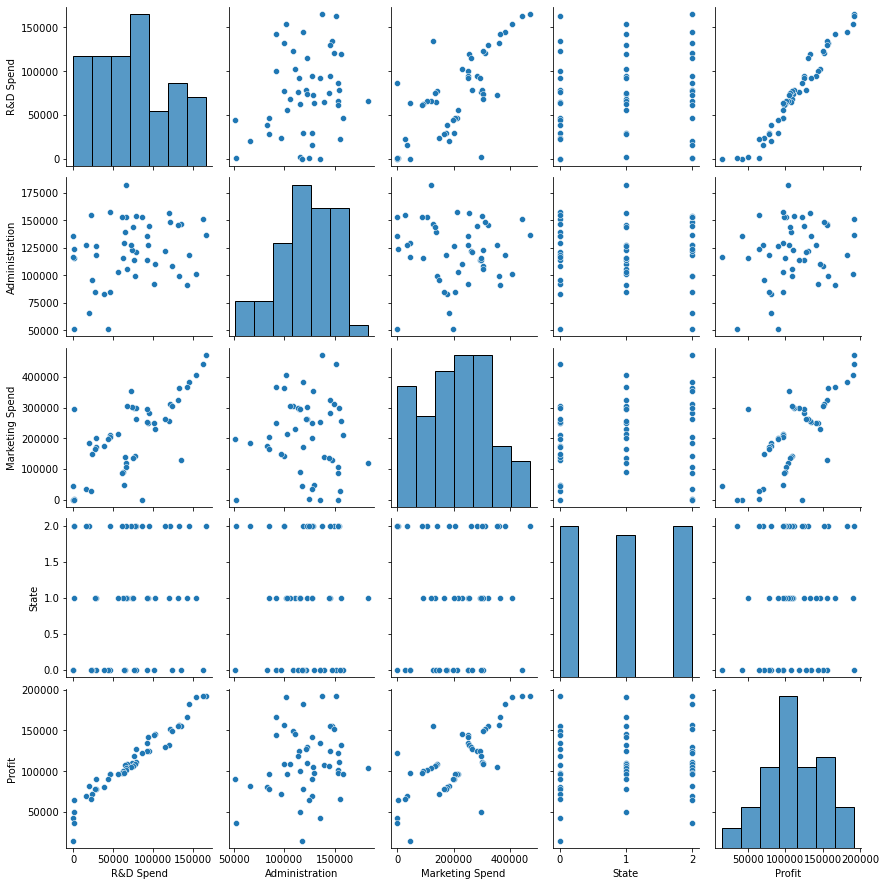

In [9]:
sns.pairplot(startup)

In [10]:
from patsy import PatsyError

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_startup = scaler.fit_transform(startup)

In [12]:
scaled_startup

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00,
         1.21267813e+00,  2.01120333e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00,
        -1.21267813e+00,  1.99942997e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00,
         0.00000000e+00,  1.98084225e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00,
         1.21267813e+00,  1.77662724e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00,
         0.00000000e+00,  1.35774012e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00,
         1.21267813e+00,  1.12724963e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01,
        -1.21267813e+00,  1.10548055e+00],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01,
         0.00000000e+00,  1.09620987e+00],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01,
         1.21267813e+00,  1.00746967e+00],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01,
        -1.21267813e+00

In [13]:
startups=startup.rename({'R&D Spend' : 'Spend','Marketing Spend' : 'MS'},axis=1)

In [14]:
startups.head()

,Spend,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


{'whiskers': [<matplotlib.lines.Line2D at 0x20e814d7dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x20e814e84c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e814d7a60>],
 'medians': [<matplotlib.lines.Line2D at 0x20e814e8b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e814e8ee0>],
 'means': []}

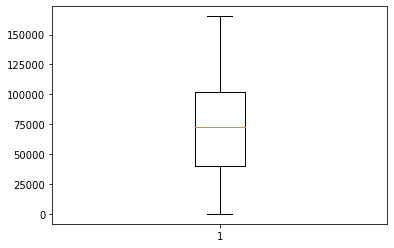

In [15]:
plt.boxplot(startups.Spend)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administration', ylabel='Density'>

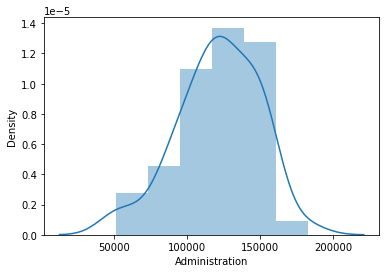

In [16]:
sns.distplot(startups.Administration)

<AxesSubplot:xlabel='State', ylabel='MS'>

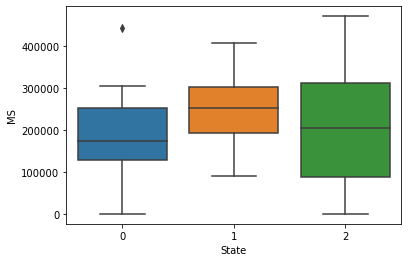

In [17]:
sns.boxplot(x='State',y="MS",data=startups)

In [18]:
#Preparing a model

model=smf.ols('Profit~Spend+Administration+MS+State',data=startups).fit()

In [19]:
print(model.tvalues,'\n',model.pvalues)

Intercept          7.368962
Spend             17.608621
Administration    -0.519906
MS                 1.636966
State             -0.013865
dtype: float64 
 Intercept         2.900008e-09
Spend             8.249206e-22
Administration    6.056771e-01
MS                1.086131e-01
State             9.889988e-01
dtype: float64


In [20]:
(model.rsquared,model.rsquared_adj)

(0.9507462044842656, 0.9463680893273114)

In [21]:
#Simple Linear Regression Model
model_spend=smf.ols('Profit~Spend',data=startups).fit()
model_spend
print(model_spend.tvalues, '\n', model_spend.pvalues)

Intercept    19.320288
Spend        29.151139
dtype: float64 
 Intercept    2.782697e-24
Spend        3.500322e-32
dtype: float64


In [22]:
(model_spend.rsquared,model_spend.rsquared_adj)

(0.9465353160804392, 0.9454214684987816)

In [23]:
model_admin=smf.ols('Profit~Administration',data=startups).fit()
model_admin
print(model_admin.tvalues, '\n', model_admin.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [24]:
(model_admin.rsquared,model_admin.rsquared_adj)

(0.04028714077757245, 0.020293122877105274)

In [25]:
model_MS=smf.ols('Profit~MS',data=startups).fit()
model_MS
print(model_MS.tvalues, '\n', model_MS.pvalues)

Intercept    7.808356
MS           7.802657
dtype: float64 
 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [26]:
(model_MS.rsquared,model_MS.rsquared_adj)

(0.5591535746115515, 0.5499692740826254)

In [27]:
model_state=smf.ols('Profit~State',data=startups).fit()
model_state
print(model_state.tvalues, '\n', model_state.pvalues)

Intercept    11.891440
State         0.708948
dtype: float64 
 Intercept    6.485443e-16
State        4.817858e-01
dtype: float64


In [28]:
(model_state.rsquared,model_state.rsquared_adj)

(0.010362489571402289, -0.010254958562526673)

In [29]:
#Calculating VIF
rsq_spend = smf.ols('Spend~Administration+MS+State',data=startups).fit().rsquared  
vif_spend = 1/(1-rsq_spend)
vif_spend

2.48117810664151

In [30]:
rsq_admin = smf.ols('Administration~Spend+MS+State',data=startups).fit().rsquared  
vif_admin = 1/(1-rsq_admin)
vif_admin

1.1753153231430187

In [31]:
rsq_MS = smf.ols('MS~Spend+Administration+State',data=startups).fit().rsquared  
vif_MS = 1/(1-rsq_MS)
vif_MS

2.326780136936846

In [32]:
rsq_state = smf.ols('State~Spend+Administration+MS',data=startups).fit().rsquared  
vif_state = 1/(1-rsq_state)
vif_state

1.0112807816962477

In [33]:
# Storing vif values in a data frame
d1 = {'Variables':['Spend','Administration','MS','State'],'VIF':[vif_spend,vif_admin,vif_MS,vif_state]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Spend,2.481178
1,Administration,1.175315
2,MS,2.326780
3,State,1.011281


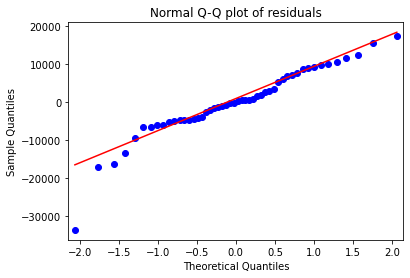

In [34]:
#Test for Normality of Residuals (Q-Q Plot)
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [35]:
list(np.where(model.resid>10000))

[array([10, 12, 16, 36, 38, 45], dtype=int64)]

In [36]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

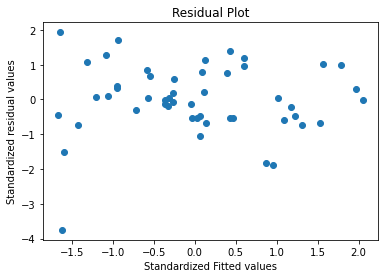

In [37]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [38]:
#Detecting Influencers/Outliers
#Cook’s Distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [39]:
model_influence.cooks_distance

(array([2.64962564e-05, 3.65460668e-03, 2.55553863e-02, 2.31878065e-02,
        1.14302043e-02, 1.23884179e-02, 3.11121982e-03, 2.80901852e-03,
        5.28558551e-05, 6.83388587e-03, 1.18531743e-02, 2.08698178e-02,
        9.05518079e-03, 7.11076506e-03, 4.81255370e-02, 4.55550364e-02,
        1.47917331e-02, 4.44019365e-03, 1.69993736e-03, 3.99363634e-02,
        6.08628041e-04, 1.22997651e-02, 2.28337576e-03, 2.15977000e-04,
        6.00485777e-03, 4.43262172e-03, 2.67612080e-03, 3.28473798e-02,
        1.03151489e-03, 1.51104626e-04, 3.28164666e-05, 9.07970048e-06,
        8.17741552e-04, 1.00239191e-04, 2.18081482e-02, 8.84928027e-03,
        4.36551851e-02, 5.68744297e-05, 6.25167081e-02, 1.85525357e-03,
        2.27307299e-03, 1.55244650e-03, 1.56379369e-04, 2.73167923e-02,
        1.17346160e-04, 1.12202649e-01, 4.28134712e-02, 5.41565252e-03,
        1.91163485e-01, 3.06028195e-01]),
 array([1.        , 0.99999742, 0.99967997, 0.99974785, 0.99995597,
        0.99994626, 0.9999

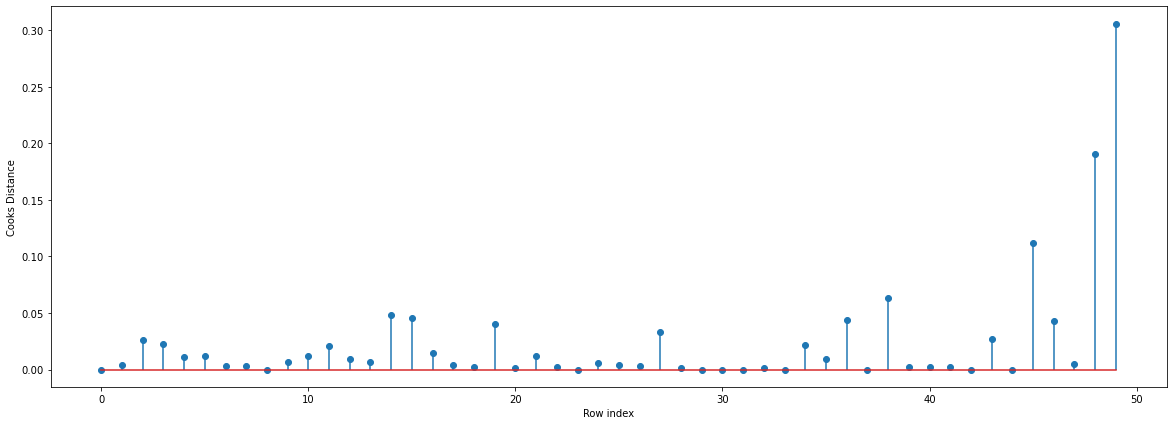

In [40]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startups)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [41]:
(np.argmax(c),np.max(c))

(49, 0.3060281954699332)

In [42]:
k = startups.shape[1]
n = startups.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [43]:
leverage_cutoff

0.36

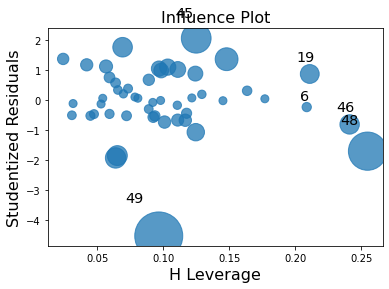

In [44]:
influence_plot(model)
plt.show()

In [45]:
startups[startups.index.isin([49])]

,Spend,Administration,MS,State,Profit
49,0.0,116983.8,45173.06,0,14681.4


In [46]:
startups.head()

,Spend,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [47]:
#Discard the data points which are influencers and reasign the row number (reset_index())
startups1=startups.drop(startups.index[[49]],axis=0).reset_index()

In [48]:
startups1.tail()

,index,Spend,Administration,MS,State,Profit
44,44,22177.74,154806.14,28334.72,0,65200.33
45,45,1000.23,124153.04,1903.93,2,64926.08
46,46,1315.46,115816.21,297114.46,1,49490.75
47,47,0.00,135426.92,0.00,0,42559.73
48,48,542.05,51743.15,0.00,2,35673.41


In [49]:
import statsmodels.formula.api as smf
model_1=smf.ols('Profit~Spend+Administration+MS+State',data=startups1).fit()

In [50]:
print(model_1.tvalues, '\n', model_1.pvalues)

Intercept          9.310864
Spend             20.367351
Administration    -0.522327
MS                 1.810536
State             -0.712532
dtype: float64 
 Intercept         5.763356e-12
Spend             4.992080e-24
Administration    6.040629e-01
MS                7.704457e-02
State             4.798970e-01
dtype: float64


In [51]:
(model_1.rsquared,model_1.rsquared_adj)

(0.9617575114723105, 0.9582809216061569)

In [52]:
#Cook’s Distance
model_influence = model_1.get_influence()
(c_1, _) = model_influence.cooks_distance

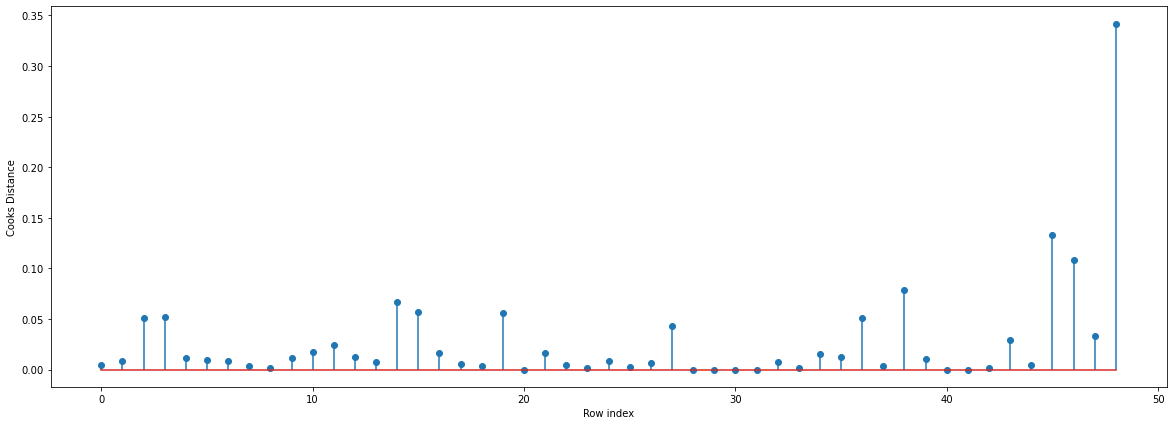

In [53]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startups1)), np.round(c_1, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [54]:
(np.argmax(c_1),np.max(c_1))

(48, 0.34222735319801867)

In [55]:
startups2=startups1.drop(startups1.index[[48]],axis=0).reset_index()

In [58]:
startups2.head()

,level_0,index,Spend,Administration,MS,State,Profit
0,0,0,165349.20,136897.80,471784.10,2,192261.83
1,1,1,162597.70,151377.59,443898.53,0,191792.06
2,2,2,153441.51,101145.55,407934.54,1,191050.39
3,3,3,144372.41,118671.85,383199.62,2,182901.99
4,4,4,142107.34,91391.77,366168.42,1,166187.94


In [62]:
startups3=startups2.iloc[:,2:7]
startups3.head()

,Spend,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [63]:
import statsmodels.formula.api as smf
model_2=smf.ols('Profit~Spend+Administration+MS+State',data=startups3).fit()

In [64]:
(model_2.rsquared,model_2.rsquared_adj)

(0.9627292717607983, 0.9592622272734307)